In [35]:
from matplotlib import pyplot as plt
from matplotlib import colors

import numpy as np
import pandas as pd
import os,glob
import logging
from helper import getModelDict
from scipy.interpolate import griddata,CloughTocher2DInterpolator
import itertools


c_light = 3e8

FORMAT = '%(levelname)s: %(message)s at %(asctime)s'
logging.basicConfig(format=FORMAT,datefmt='%m/%d/%Y %I:%M:%S %p')
logger = logging.getLogger()

In [2]:
defaultPars = {'figure.figsize': (5, 4),
               'lines.markersize' : 4,
               'axes.titlesize' : 13,
               'font.size' : 13,
               'axes.labelsize' : 16,
               'xtick.labelsize' : 13,
               'ytick.labelsize' : 13,
               'legend.fontsize' : 10,
               "text.usetex": True,
               "font.family": "sans-serif",
               "font.sans-serif": ["Helvetica"],
               'font.family':'Times New Roman', 
               'font.serif':'Times New Roman',
               "savefig.dpi" : 300,
               'contour.linewidth' : 2.0,
               'lines.linewidth' : 2.0,
               'axes.grid' : True,
               'grid.linewidth' : 0.5,
               'grid.color' : 'lightgray',
               'axes.axisbelow' : True
               }
plt.rcParams.update(defaultPars)

### Banner files to be read

In [3]:
files = list(glob.glob('./width_results/*.dat'))

modelDict = {}
for f in files:
    if not os.path.isfile(f):
        print(f'File {f} not found. Skipping.')
    else:
        modelDict[f] = getModelDict(f,verbose=False,bannerFile=f)


In [4]:
df = pd.DataFrame.from_dict(modelDict.values()).round({'m0' : 1, 'm1'  : 1})

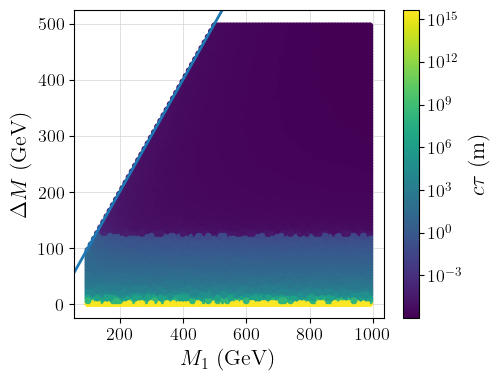

In [5]:
plt.scatter(df['m1'],df['m1']-df['m0'],c=df['tau']*c_light,norm=colors.LogNorm())
plt.colorbar(label=r'$c \tau$ (m)')
plt.xlabel(r'$M_1$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.axline((100.,100.),(500.,500.))
plt.show()

In [24]:
interp = CloughTocher2DInterpolator(df[['m1','m0']],values=(np.log10(df['tau']*c_light)),rescale=False)

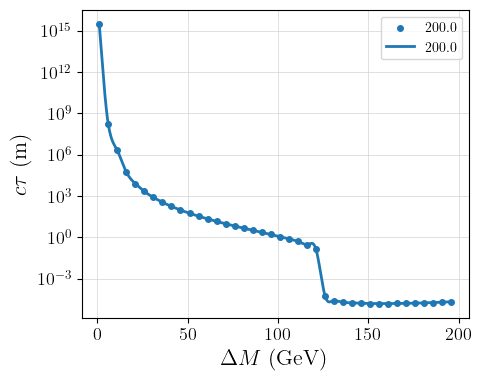

In [34]:
iplots = 0
for m1,m1_index in df.groupby('m1').groups.items():
    if m1 < 195.0 or m1 > 200.0:
        continue
    dmList = np.linspace(1.,(m1-1.0),1000)
    log_ctau = np.array([interp(m1,m1-dm) for dm in dmList])
    ctau = 10**log_ctau
    dfFilter = df.iloc[m1_index]
    plt.scatter(dfFilter['m1']-dfFilter['m0'],dfFilter['tau']*c_light,label=f'{m1:1.1f}')
    plt.plot(dmList,ctau,label=f'{m1:1.1f}')
    
plt.ylabel(r'$c \tau$ (m)')
plt.xlabel(r'$\Delta M$ (GeV)')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
def getLambdaFor(interp,m1,m0,ctau_m,lambdauv0=1e7):
    ctau0 = (10**interp((m1,m0)))/c_light
    lambdauv = np.sqrt(ctau_m/ctau0)*lambdauv0

    return lambdauv


In [47]:
dmList = [50.,100.]
betaList = [0.1]
ctauList = [1.0,5.0,10.,15.,20.]
msList = [250., 500., 1000., 2000.]
points = []
for dm,ms,beta,ctau in itertools.product(dmList,msList,betaList,ctauList):
    m1 = float(np.round(0.5*ms*np.sqrt(1.0-beta**2),2))
    m0 = float(np.round(max(1.,m1-dm),2))
    lambdauv = f'{float(getLambdaFor(interp,m1,m0,ctau,lambdauv0=1e7)):1.3e}'
    points.append((ms,m1,m0,lambdauv,ctau))
print(points)

[(250.0, 124.37, 74.37, '1.869e+10', 1.0), (250.0, 124.37, 74.37, '4.179e+10', 5.0), (250.0, 124.37, 74.37, '5.910e+10', 10.0), (250.0, 124.37, 74.37, '7.238e+10', 15.0), (250.0, 124.37, 74.37, '8.358e+10', 20.0), (500.0, 248.75, 198.75, '2.291e+10', 1.0), (500.0, 248.75, 198.75, '5.122e+10', 5.0), (500.0, 248.75, 198.75, '7.244e+10', 10.0), (500.0, 248.75, 198.75, '8.872e+10', 15.0), (500.0, 248.75, 198.75, '1.024e+11', 20.0), (1000.0, 497.49, 447.49, '2.494e+10', 1.0), (1000.0, 497.49, 447.49, '5.578e+10', 5.0), (1000.0, 497.49, 447.49, '7.888e+10', 10.0), (1000.0, 497.49, 447.49, '9.661e+10', 15.0), (1000.0, 497.49, 447.49, '1.116e+11', 20.0), (2000.0, 994.99, 944.99, 'nan', 1.0), (2000.0, 994.99, 944.99, 'nan', 5.0), (2000.0, 994.99, 944.99, 'nan', 10.0), (2000.0, 994.99, 944.99, 'nan', 15.0), (2000.0, 994.99, 944.99, 'nan', 20.0), (250.0, 124.37, 24.37, '9.552e+10', 1.0), (250.0, 124.37, 24.37, '2.136e+11', 5.0), (250.0, 124.37, 24.37, '3.021e+11', 10.0), (250.0, 124.37, 24.37, '3

In [ ]:
df[]